In [15]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [16]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [17]:
print(train_images.shape[1:])

(28, 28)


In [18]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [19]:

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')


In [20]:
#scaling the data
train_data /=255.0
test_data /=255.0

In [21]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [22]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3671 - accuracy: 0.9006 - val_loss: 0.1429 - val_accuracy: 0.9587
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1040 - accuracy: 0.9698 - val_loss: 0.1315 - val_accuracy: 0.9610
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0794 - val_accuracy: 0.9767
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0820 - val_accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.1153 - val_accuracy: 0.9679
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0955 - val_accuracy: 0.9767
Epoch 7/10
60000/60000 [==============================] - 6s 94us/

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


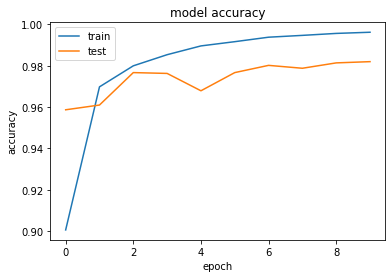

In [25]:
# Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

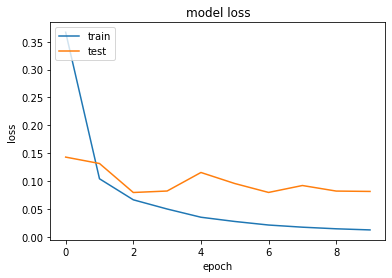

In [26]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


10000/10000 [==============================] - 1s 72us/step
Evaluation result on Test Data : Loss = 0.08131038340411614, accuracy = 0.9819999933242798


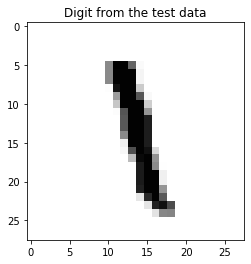

In [29]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 700
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()

In [30]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())
print(history.history.keys())

Predicted digit: 1
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
